<a href="https://colab.research.google.com/github/sun226/AI2/blob/main/d_customLoad_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
 import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

from torch.autograd import Variable
import numpy as np

from PIL import Image

In [28]:
batch_size=2
imgsize=256

In [29]:
import os
import pandas as pd

def MyGetInfoFromCsv(i_csv_path, i_img_path,i_key_field='technique'):
    cwd=os.getcwd()
    with open(i_csv_path, encoding='windows-1252')as csvfile:
         info=pd.read_csv(csvfile)

    classes=sorted(set(info[i_key_field]))
    class_to_idx={}
    total_file_list=[]
    total_label=[]

    for i, c in enumerate(classes):
      class_to_idx.update({c:i})
    length=len(info)

    for i in range(length):
        key_val= info[i_key_field][i]
        total_file_list.append(i_img_path+info['image_id'][i]+".jpg")
        total_label.append(class_to_idx[key_val])
    return classes, class_to_idx, length, total_file_list, total_label

In [30]:
csv_path= "drive/MyDrive/wiki/"+"wikipaintings_oct2013_technique+test+15.csv"
img_path= "drive/MyDrive/wiki/"+"images/"
classes, class_to_idx, length, flist, labels = MyGetInfoFromCsv(csv_path, img_path, "technique")

print(classes)
print(class_to_idx)
print(length)
print(flist[:3])
print(labels[:3])

['oil', 'pastel', 'pencil', 'watercolor']
{'oil': 0, 'pastel': 1, 'pencil': 2, 'watercolor': 3}
563
['drive/MyDrive/wiki/images/john-william-waterhouse_ophelia-1894.jpg', 'drive/MyDrive/wiki/images/yves-tanguy_death-awaiting-his-family-1927.jpg', 'drive/MyDrive/wiki/images/john-french-sloan_stein-profile-foreign-girl-1905.jpg']
[0, 0, 0]


In [31]:
class MyImageCSV(Dataset):
    def __init__(self, i_csv_path, i_img_path, i_key_field,
                 i_imgsize=128,
                 i_DataAug=False, transform=transforms.ToTensor()):
      self.classes, self.class_to_idx,self.length,self.flist,self.labels=MyGetInfoFromCsv(i_csv_path, i_img_path, i_key_field)
      self.imgsize=i_imgsize
      self.i_DataAug=i_DataAug
      self.transform=transform

    def __len__(self):
      return self.length

    def __getitem__ (self,idx):
      max_size=self.imgsize

      img= Image.open(self.flist[idx])

      if(img.mode!="RGB"):
        img=img.convert(mode="RGB")
      
      img=self.transform(img)
      label=self.labels[idx]

      return img, label

In [32]:
csv_path="drive/MyDrive/wiki/"+"wikipaintings_oct2013_technique+test+15.csv"
img_path="drive/MyDrive/wiki/"+"images/"

my_test= MyImageCSV(csv_path, img_path, 'technique',
                    i_imgsize=imgsize, i_DataAug=True)

nclass=len(my_test.classes)
print("# of classes(클래스 개수): %d" %nclass)
print("클래이 이름:", my_test.classes)
print("클래스별 인덱스:", my_test.class_to_idx)
print("my_train 개수:", my_test.__len__())

# of classes(클래스 개수): 4
클래이 이름: ['oil', 'pastel', 'pencil', 'watercolor']
클래스별 인덱스: {'oil': 0, 'pastel': 1, 'pencil': 2, 'watercolor': 3}
my_train 개수: 563


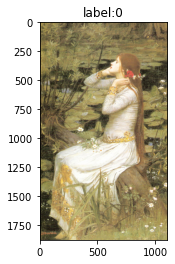

torch.Size([1879, 1100, 3])


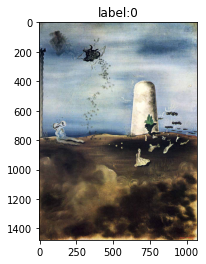

torch.Size([1478, 1069, 3])


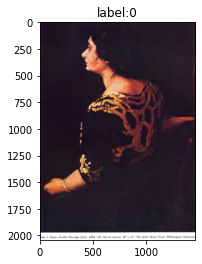

torch.Size([2042, 1462, 3])


In [33]:
for i in range(3):
  img=my_test[i][0]
  img=np.transpose(img,(1,2,0))

  plt.title("label:%d" %my_test[i][1])
  plt.imshow(img)
  plt.show()

  print(img.shape)

In [34]:
my_test=MyImageCSV(csv_path, img_path, 'technique',
                   i_imgsize=imgsize,
                   i_DataAug=True,
                   transform=transforms.Compose([transforms.Resize((imgsize, imgsize)),
                                                 transforms.ToTensor()])
                   )
my_loader=DataLoader(my_test, batch_size=batch_size,
                        shuffle=False, num_workers=2)

[0]
한 번에 로드되는 데이터 크기: 2
torch.Size([2, 3, 256, 256])
torch.Size([2])


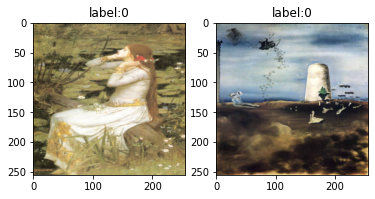

[1]
한 번에 로드되는 데이터 크기: 2
torch.Size([2, 3, 256, 256])
torch.Size([2])


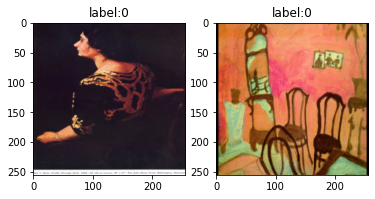

In [35]:
n=2
for i,[imgs, labels] in enumerate(my_loader):
  if i>1:
    break

  print ("[%d]"%i)
  print ("한 번에 로드되는 데이터 크기:", len(imgs))

  x=Variable(imgs)
  y_=Variable(labels)

  print(x.shape)
  print(y_.shape)


  for j in range(n):
      img = imgs[j].numpy()
      img = np.transpose(img, (1, 2, 0))

      plt.subplot(1,n,j+1)
      plt.imshow(img)
      plt.title("label:%d"%labels[j])
  plt.show()